In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_df = pd.read_pickle('data/main_df_ver01.pkl')
main_df.head(10)

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2006-12-28,12501,1.267400e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-29,12463,1.615600e+08,NaN,NaN,NaN,NaN,12501.0,NaN,NaN,NaN,NaN
2006-12-30,12465,1.946880e+08,NaN,NaN,NaN,NaN,12463.0,12501.0,NaN,NaN,NaN
2006-12-31,12467,2.278160e+08,NaN,NaN,NaN,NaN,12465.0,12463.0,12501.0,NaN,NaN
2007-01-01,12469,2.609440e+08,NaN,NaN,NaN,NaN,12467.0,12465.0,12463.0,12501.0,NaN
2007-01-02,12472,2.940720e+08,0.160,0.738,0.102,-0.9851,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.119,0.772,0.109,-0.4451,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.192,0.744,0.064,-0.9994,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.114,0.823,0.063,-0.9972,12480.0,12474.0,12472.0,12469.0,12467.0


In [3]:
main_df = main_df.dropna()
main_df

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2007-01-02,12472,2.940720e+08,0.160,0.738,0.102,-0.9851,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.119,0.772,0.109,-0.4451,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.192,0.744,0.064,-0.9994,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.114,0.823,0.063,-0.9972,12480.0,12474.0,12472.0,12469.0,12467.0
2007-01-06,12406,2.313133e+08,0.083,0.827,0.090,0.9720,12398.0,12480.0,12474.0,12472.0,12469.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,19945,1.585400e+08,0.160,0.743,0.097,-0.9837,19942.0,19939.0,19936.0,19933.0,19918.0
2016-12-28,19833,1.883500e+08,0.150,0.748,0.102,-0.9845,19945.0,19942.0,19939.0,19936.0,19933.0
2016-12-29,19819,1.720400e+08,0.116,0.780,0.104,-0.3421,19833.0,19945.0,19942.0,19939.0,19936.0


In [6]:
main_df['target'] = main_df.Close - main_df.t_1
main_df

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5,target
Date,,,,,,,,,,,,
2007-01-02,12472,2.940720e+08,0.160,0.738,0.102,-0.9851,12469.0,12467.0,12465.0,12463.0,12501.0,3.0
2007-01-03,12474,3.272000e+08,0.119,0.772,0.109,-0.4451,12472.0,12469.0,12467.0,12465.0,12463.0,2.0
2007-01-04,12480,2.590600e+08,0.192,0.744,0.064,-0.9994,12474.0,12472.0,12469.0,12467.0,12465.0,6.0
2007-01-05,12398,2.352200e+08,0.114,0.823,0.063,-0.9972,12480.0,12474.0,12472.0,12469.0,12467.0,-82.0
2007-01-06,12406,2.313133e+08,0.083,0.827,0.090,0.9720,12398.0,12480.0,12474.0,12472.0,12469.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,19945,1.585400e+08,0.160,0.743,0.097,-0.9837,19942.0,19939.0,19936.0,19933.0,19918.0,3.0
2016-12-28,19833,1.883500e+08,0.150,0.748,0.102,-0.9845,19945.0,19942.0,19939.0,19936.0,19933.0,-112.0
2016-12-29,19819,1.720400e+08,0.116,0.780,0.104,-0.3421,19833.0,19945.0,19942.0,19939.0,19936.0,-14.0


In [9]:
train_end = pd.to_datetime('2014-12-31')
test_start = train_end + pd.Timedelta(1, unit='D')
#test_start = pd.to_datetime('2015-01-01')
train_x = main_df.loc[:train_end]
test_x = main_df.loc[test_start:]
train_y = train_x.target
test_y = test_x.target
train_x = train_x.drop(columns=['Close','target'])
test_x = test_x.drop(columns=['Close','target'])

In [12]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor()

In [13]:
pred = rf.predict(test_x)
pred = pd.DataFrame(data=pred, index=test_x.index, columns=['pred'])
pred

,pred
Date,
2015-01-01,-83.22
2015-01-02,-23.55
2015-01-03,-113.13
2015-01-04,-110.16
2015-01-05,-65.60
...,...
2016-12-27,-91.39
2016-12-28,-79.59
2016-12-29,-60.53


In [15]:
mean_squared_error(test_y,pred)

16313.018475616438

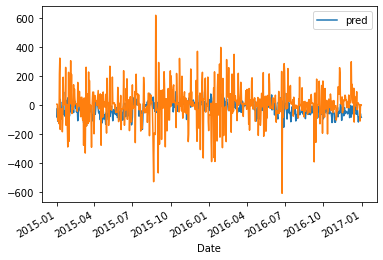

In [18]:
ax = pred.plot()
fig = test_y.plot(ax=ax)

<AxesSubplot:xlabel='Date'>

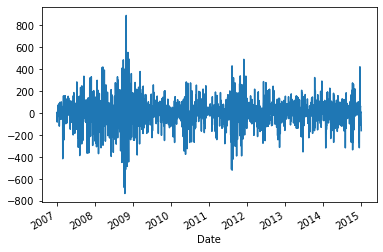

In [19]:
train_y.plot()

- 이동평균, 지수이동평균

In [23]:
main_df = main_df.drop(columns=['Close','t_1','t_2','t_3','t_4','t_5'])
main_df

,Volume,neg,neu,pos,compound,target
Date,,,,,,
2007-01-02,2.940720e+08,0.160,0.738,0.102,-0.9851,3.0
2007-01-03,3.272000e+08,0.119,0.772,0.109,-0.4451,2.0
2007-01-04,2.590600e+08,0.192,0.744,0.064,-0.9994,6.0
2007-01-05,2.352200e+08,0.114,0.823,0.063,-0.9972,-82.0
2007-01-06,2.313133e+08,0.083,0.827,0.090,0.9720,8.0
...,...,...,...,...,...,...
2016-12-27,1.585400e+08,0.160,0.743,0.097,-0.9837,3.0
2016-12-28,1.883500e+08,0.150,0.748,0.102,-0.9845,-112.0
2016-12-29,1.720400e+08,0.116,0.780,0.104,-0.3421,-14.0


In [27]:
# 이동평균(5일)
main_df.target.rolling(5).mean()

Date
2007-01-02     NaN
2007-01-03     NaN
2007-01-04     NaN
2007-01-05     NaN
2007-01-06   -12.6
              ... 
2016-12-27     5.4
2016-12-28   -20.0
2016-12-29   -23.4
2016-12-30   -24.0
2016-12-31   -24.6
Name: target, Length: 3650, dtype: float64

In [28]:
#지수이동평균(5일)
main_df.target.ewm(5).mean()

Date
2007-01-02     3.000000
2007-01-03     2.454545
2007-01-04     3.857143
2007-01-05   -23.780924
2007-01-06   -14.925177
                ...    
2016-12-27     8.768780
2016-12-28   -11.359350
2016-12-29   -11.799458
2016-12-30    -9.832882
2016-12-31    -8.194068
Name: target, Length: 3650, dtype: float64

In [37]:
moving_target = main_df[['target']].copy()
moving_target.index = moving_target.index + pd.Timedelta(1, unit='D')
moving_target.columns=['moving_target']
main_df = main_df.join(moving_target, how='left')
main_df

,Volume,neg,neu,pos,compound,target,mw_5,moving_target
Date,,,,,,,,
2007-01-02,2.940720e+08,0.160,0.738,0.102,-0.9851,3.0,NaN,NaN
2007-01-03,3.272000e+08,0.119,0.772,0.109,-0.4451,2.0,NaN,3.0
2007-01-04,2.590600e+08,0.192,0.744,0.064,-0.9994,6.0,NaN,2.0
2007-01-05,2.352200e+08,0.114,0.823,0.063,-0.9972,-82.0,NaN,6.0
2007-01-06,2.313133e+08,0.083,0.827,0.090,0.9720,8.0,-12.6,-82.0
...,...,...,...,...,...,...,...,...
2016-12-27,1.585400e+08,0.160,0.743,0.097,-0.9837,3.0,5.4,3.0
2016-12-28,1.883500e+08,0.150,0.748,0.102,-0.9845,-112.0,-20.0,3.0
2016-12-29,1.720400e+08,0.116,0.780,0.104,-0.3421,-14.0,-23.4,-112.0


In [39]:
main_df['mw_5'] = main_df.moving_target.rolling(5).mean()
main_df.head(10)

,Volume,neg,neu,pos,compound,target,mw_5,moving_target
Date,,,,,,,,
2007-01-02,2.940720e+08,0.160,0.738,0.102,-0.9851,3.0,NaN,NaN
2007-01-03,3.272000e+08,0.119,0.772,0.109,-0.4451,2.0,NaN,3.0
2007-01-04,2.590600e+08,0.192,0.744,0.064,-0.9994,6.0,NaN,2.0
2007-01-05,2.352200e+08,0.114,0.823,0.063,-0.9972,-82.0,NaN,6.0
2007-01-06,2.313133e+08,0.083,0.827,0.090,0.9720,8.0,NaN,-82.0
2007-01-07,2.274067e+08,0.132,0.782,0.086,-0.9910,8.0,-12.6,8.0
2007-01-08,2.235000e+08,0.134,0.730,0.136,0.9848,9.0,-11.6,8.0
2007-01-09,2.251900e+08,0.094,0.823,0.084,-0.9359,-7.0,-10.2,9.0
2007-01-10,2.265700e+08,0.090,0.855,0.055,-0.9874,26.0,-12.8,-7.0


In [42]:
main_df['mw_20'] = main_df.moving_target.rolling(20).mean()
main_df['mw_60'] = main_df.moving_target.rolling(60).mean()
main_df['mw_120'] = main_df.moving_target.rolling(120).mean()
main_df['ewm_5'] = main_df.moving_target.ewm(5).mean()
main_df['ewm_20'] = main_df.moving_target.ewm(20).mean()
main_df['ewm_60'] = main_df.moving_target.ewm(60).mean()
main_df['ewm_120'] = main_df.moving_target.ewm(120).mean()
main_df = main_df.dropna()
main_df.head()

,Volume,neg,neu,pos,compound,target,mw_5,moving_target,mw_20,mw_60,mw_120,ewm_5,ewm_20,ewm_60,ewm_120
Date,,,,,,,,,,,,,,,
2007-08-20,231800000.0,0.101,0.835,0.064,-0.9783,14.0,15.8,14.0,-12.55,-6.366667,1.333333,-3.787960,-12.467756,-3.871732,-0.367513
2007-08-21,204000000.0,0.110,0.804,0.085,-0.9867,-31.0,52.0,14.0,-4.50,-7.066667,1.566667,-0.823300,-11.207206,-3.571379,-0.227606
2007-08-22,205530000.0,0.130,0.811,0.060,-0.9980,146.0,49.0,-31.0,-13.60,-4.500000,1.425000,-5.852750,-12.149849,-4.032155,-0.526819
2007-08-23,198160000.0,0.142,0.766,0.092,-0.9949,-1.0,31.4,146.0,-11.35,-2.016667,2.358333,19.456042,-4.617925,-1.512771,0.895849
2007-08-24,186060000.0,0.094,0.820,0.086,0.4292,143.0,28.4,-1.0,2.70,-1.983333,1.216667,16.046701,-4.445621,-1.504164,0.877468


In [43]:
train_end = pd.to_datetime('2014-12-31')
test_start = train_end + pd.Timedelta(1, unit='D')
#test_start = pd.to_datetime('2015-01-01')
train_x = main_df.loc[:train_end]
test_x = main_df.loc[test_start:]
train_y = train_x.target
test_y = test_x.target
train_x = train_x.drop(columns=['moving_target','target'])
test_x = test_x.drop(columns=['moving_target','target'])

In [44]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor()

In [45]:
pred = rf.predict(test_x)
pred = pd.DataFrame(data=pred, index=test_x.index, columns=['pred'])
pred

,pred
Date,
2015-01-01,1.23
2015-01-02,22.20
2015-01-03,30.37
2015-01-04,25.27
2015-01-05,34.91
...,...
2016-12-27,-86.16
2016-12-28,-58.20
2016-12-29,-82.48


In [46]:
mean_squared_error(test_y,pred)

16404.748374098363

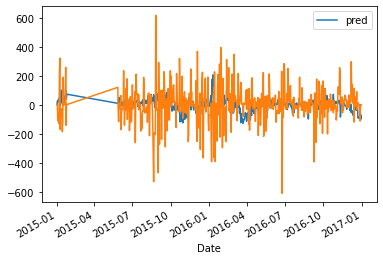

In [48]:
ax = pred.plot()
fig = test_y.plot(ax=ax)

- 분류문제로 변경

In [50]:
main_df['new_target'] = (main_df.target>0).astype('int')
main_df

<ipython-input-50-b6175ba5a66c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['new_target'] = (main_df.target>0).astype('int')


,Volume,neg,neu,pos,compound,target,mw_5,moving_target,mw_20,mw_60,mw_120,ewm_5,ewm_20,ewm_60,ewm_120,new_target
Date,,,,,,,,,,,,,,,,
2007-08-20,231800000.0,0.101,0.835,0.064,-0.9783,14.0,15.8,14.0,-12.55,-6.366667,1.333333,-3.787960,-12.467756,-3.871732,-0.367513,1
2007-08-21,204000000.0,0.110,0.804,0.085,-0.9867,-31.0,52.0,14.0,-4.50,-7.066667,1.566667,-0.823300,-11.207206,-3.571379,-0.227606,0
2007-08-22,205530000.0,0.130,0.811,0.060,-0.9980,146.0,49.0,-31.0,-13.60,-4.500000,1.425000,-5.852750,-12.149849,-4.032155,-0.526819,1
2007-08-23,198160000.0,0.142,0.766,0.092,-0.9949,-1.0,31.4,146.0,-11.35,-2.016667,2.358333,19.456042,-4.617925,-1.512771,0.895849,0
2007-08-24,186060000.0,0.094,0.820,0.086,0.4292,143.0,28.4,-1.0,2.70,-1.983333,1.216667,16.046701,-4.445621,-1.504164,0.877468,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,158540000.0,0.160,0.743,0.097,-0.9837,3.0,0.2,3.0,34.55,29.550000,12.291667,9.922536,23.124210,17.825776,12.385034,1
2016-12-28,188350000.0,0.150,0.748,0.102,-0.9845,-112.0,5.4,3.0,19.80,29.733333,12.025000,8.768780,22.165915,17.582730,12.307470,0
2016-12-29,172040000.0,0.116,0.780,0.104,-0.3421,-14.0,-20.0,-112.0,10.95,27.983333,11.491667,-11.359350,15.777062,15.458423,11.280110,0


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
train_end = pd.to_datetime('2014-12-31')
test_start = train_end + pd.Timedelta(1, unit='D')
#test_start = pd.to_datetime('2015-01-01')
train_x = main_df.loc[:train_end]
test_x = main_df.loc[test_start:]
train_y = train_x.new_target
test_y = test_x.new_target
train_x = train_x.drop(columns=['moving_target','target','new_target'])
test_x = test_x.drop(columns=['moving_target','target','new_target'])

In [53]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

In [54]:
pred = rf.predict(test_x)
pred

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,

In [57]:
(pred == test_y).mean()

0.4672131147540984